In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [113]:
digits = datasets.load_digits()

In [114]:
X = digits.data
y = digits.target

mask = y < 3

X = X[mask]
y = y[mask]

In [115]:
y[:15]

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0])

In [116]:
X.shape

(537, 64)

In [117]:
y.shape

(537,)

In [118]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [119]:
pca.components_.shape

(4, 64)

In [120]:
Z = pca.transform(X)

In [121]:
Z.shape

(537, 4)

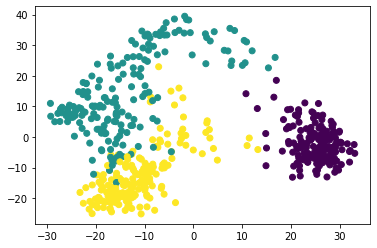

In [122]:
plt.scatter(Z[:,0],Z[:,1],c=y)

In [127]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = Z

X, y = make_classification(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle = True)


In [133]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

xgbc = XGBClassifier()
# print(xgbc)

In [134]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [141]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

Mean cross-validation score: 0.89
K-fold CV average score: 0.91


In [142]:
y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred) 
print(cm)


[[12  1]
 [ 1 11]]


In [ ]:


import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))


In [ ]:
# clf = GradientBoostingClassifier(random_state=0)


clf.fit(X_train, y_train)

xgb_predict = clf.predict(X_test)

clf.score(X_test, y_test)

In [105]:
xgb_predict

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,xgb_predict))
print(classification_report(y_test,xgb_predict))

[[12  1]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [107]:
y_test.shape,xgb_predict.shape

((25,), (25,))